In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import gc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pal = sns.color_palette()

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

print('# File sizes')
dir_location = 'input/'
for f in os.listdir(dir_location):
    if not os.path.isdir(dir_location + f):
        print(f.ljust(30) + str(round(os.path.getsize(dir_location + f) / 1000000, 2)) + 'MB')
    else:
        sizes = [os.path.getsize(dir_location+f+'/'+x)/1000000 for x in os.listdir(dir_location + f)]
        print(f.ljust(30) + str(round(sum(sizes), 2)) + 'MB' + ' ({} files)'.format(len(sizes)))

# File sizes
.DS_Store                     0.01MB
Kaggle-planet-test-tif        20883.99MB
Kaggle-planet-train-tif       13815.6MB
sample_submission.csv         1.94MB
test-jpg                      637.8MB (40669 files)
test-jpg-additional           321.08MB (20522 files)
train-jpg                     634.68MB (40479 files)
train-jpg-sample              1.57MB (100 files)
train-tif-sample              54.36MB (100 files)
train.csv                     1.43MB
train_v2.csv                  1.43MB


In [7]:
df_train = pd.read_csv(dir_location + 'train.csv')
df_train.head()
labels = df_train['tags'].apply(lambda x: x.split(' '))

In [8]:
labels = df_train['tags'].apply(lambda x: x.split(' '))
from collections import Counter, defaultdict
counts = defaultdict(int)
for l in labels:
    for l2 in l:
        counts[l2] += 1

data=[go.Bar(x=list(counts.keys()), y=list(counts.values()))]
layout=dict(height=800, width=800, title='Distribution of training labels')
fig=dict(data=data, layout=layout)
py.iplot(data, filename='train-label-dist')

AttributeError: 'AxesSubplot' object has no attribute 'show'

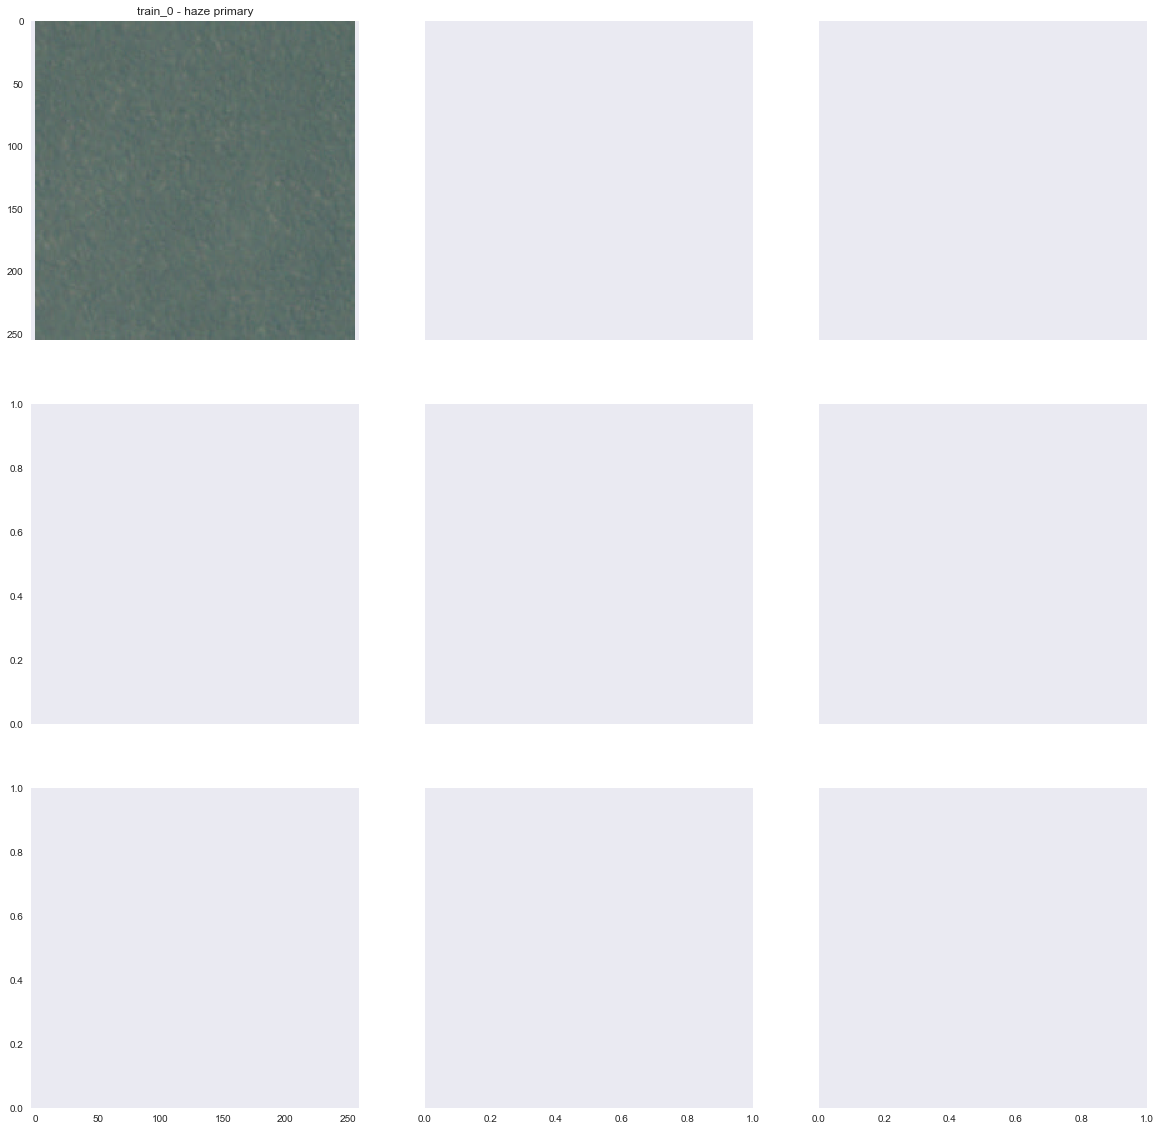

In [12]:
import cv2
%matplotlib inline

new_style = {'grid': False}
plt.rc('axes', **new_style)
_, ax = plt.subplots(3, 3, sharex='col', sharey='row', figsize=(20, 20))
i = 0
for f, l in df_train[:9].values:
    img = cv2.imread(dir_location + '/train-jpg/{}.jpg'.format(f))
    ax[i // 3, i % 3].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax[i // 3, i % 3].set_title('{} - {}'.format(f, l))
    ax[i // 4, i % 4].show()
    i += 1
    
plt.show()

In [ ]:
# Co-occurence Matrix
com = np.zeros([len(counts)]*2)
for i, l in enumerate(list(counts.keys())):
    for i2, l2 in enumerate(list(counts.keys())):
        c = 0
        cy = 0
        for row in labels.values:
            if l in row:
                c += 1
                if l2 in row: cy += 1
        com[i, i2] = cy / c

data=[go.Heatmap(z=com, x=list(counts.keys()), y=list(counts.keys()))]
layout=go.Layout(height=800, width=800, title='Co-occurence matrix of training labels')
fig=dict(data=data, layout=layout)
py.iplot(data, filename='train-com')